# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

/Users/yashv/Desktop/UPenn_Courses/Labs/CSS/team-process-map/team_process_map/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/yashv/Desktop/UPenn_Courses/Labs/CSS/team-process-map/team_process_map/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecat

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_chat_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_chat_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_

# Juries Model

In [3]:
juries_model = ModelBuilder()

In [4]:
juries_model.select_target(target=juries_model.conv_complete["majority_pct"])

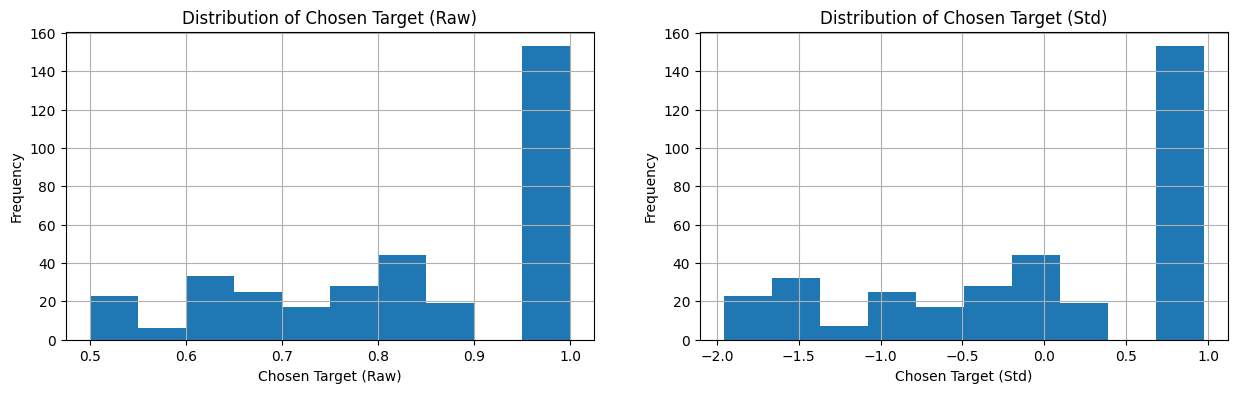

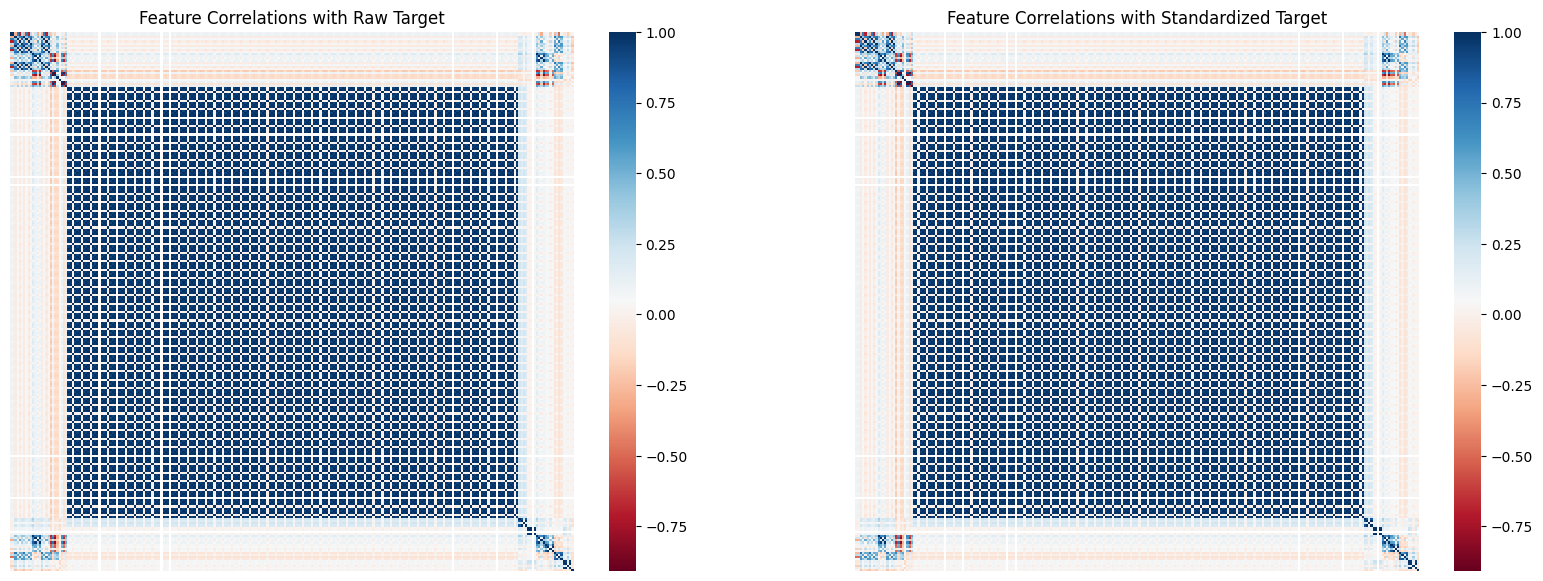

In [5]:
juries_model.viz_target()

In [6]:
juries_model.define_model()

In [7]:
juries_model.model_metrics(juries_model.baseline_model)

Model Metrics
R2: 0.2164	MAE: 0.9155	MSE: 1.2099	RMSE: 1.1


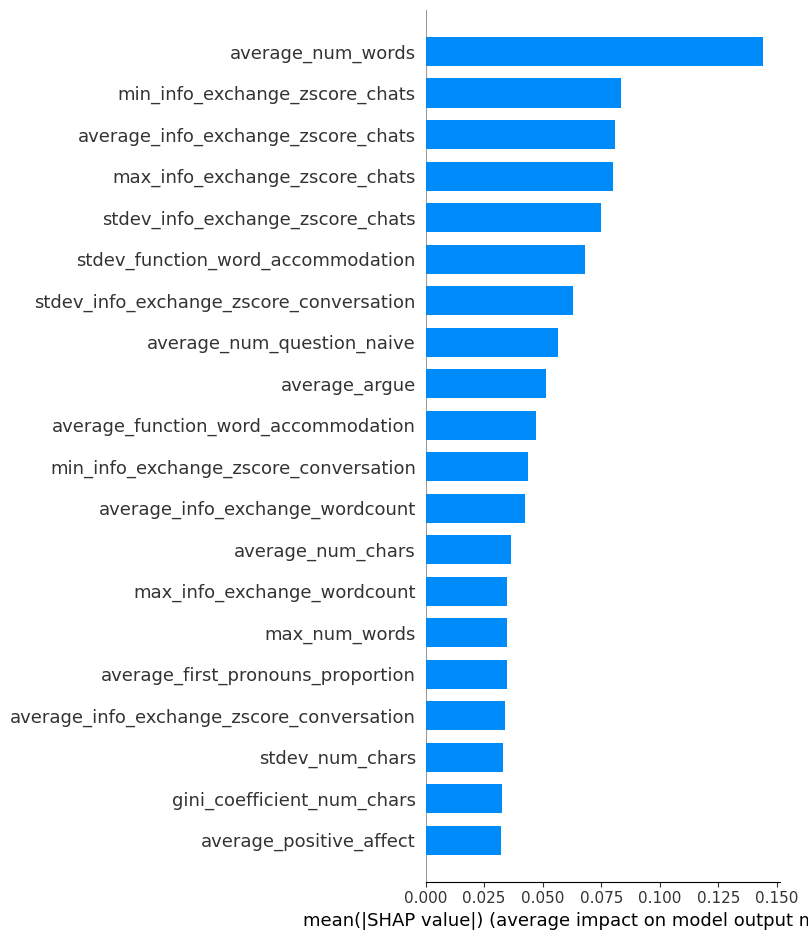

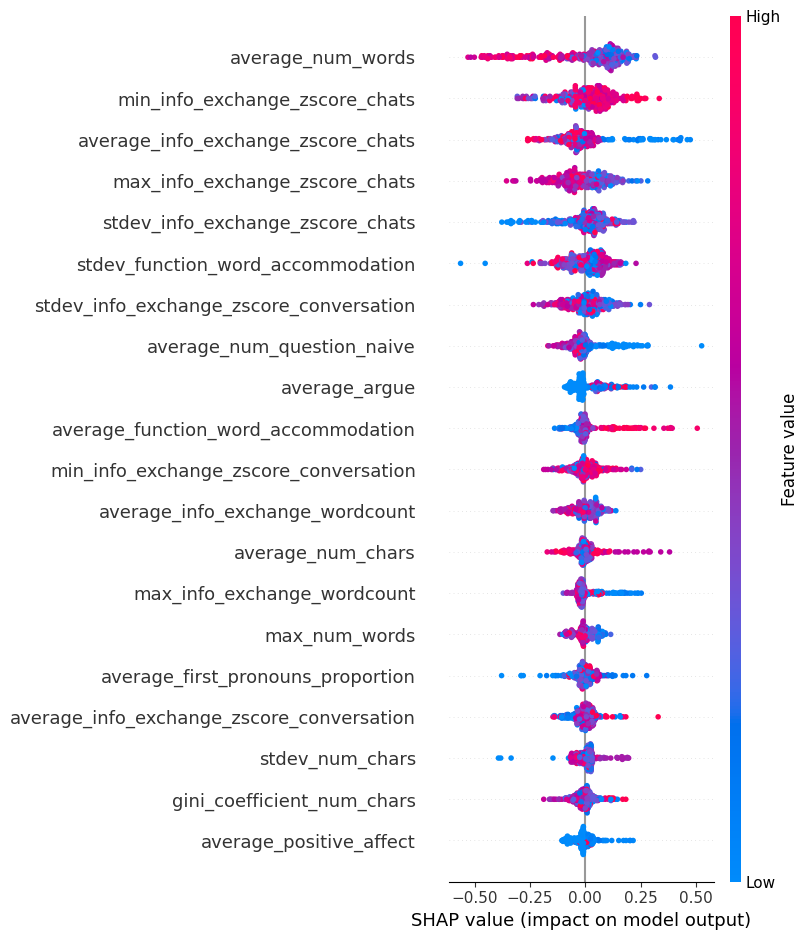

In [8]:
juries_model.model_diagnostics(juries_model.baseline_model)

In [10]:
juries_model.optimize_model()

[I 2023-05-11 20:22:27,104] A new study created in memory with name: no-name-71d8f5b1-a036-4852-bd69-3137f101934a


[20:22:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:22:31,138] Trial 0 finished with value: 1.0268 and parameters: {'criterion': 'poisson', 'n_estimators': 371, 'max_depth': 4, 'max_features': 0.01578562129998432, 'max_samples': 0.3699779130267442, 'learning_rate': 0.007259142356235293, 'gamma': 0.001414039973665795}. Best is trial 0 with value: 1.0268.


[20:22:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:22:43,903] Trial 1 finished with value: 1.1568 and parameters: {'criterion': 'absolute_error', 'n_estimators': 1431, 'max_depth': 3, 'max_features': 0.6017902627565983, 'max_samples': 0.3340665966233491, 'learning_rate': 0.00999365344589389, 'gamma': 0.013769519723259165}. Best is trial 0 with value: 1.0268.


[20:22:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:22:53,890] Trial 2 finished with value: 1.1147 and parameters: {'criterion': 'absolute_error', 'n_estimators': 1095, 'max_depth': 3, 'max_features': 0.5765492737693525, 'max_samples': 0.9430203087316688, 'learning_rate': 0.00736775392996082, 'gamma': 0.01991060751129179}. Best is trial 0 with value: 1.0268.


[20:22:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:22:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:23:01,225] Trial 3 finished with value: 1.2696 and parameters: {'criterion': 'squared_error', 'n_estimators': 350, 'max_depth': 13, 'max_features': 0.8450823126786133, 'max_samples': 0.9721719444831022, 'learning_rate': 0.008741873487296234, 'gamma': 0.016714366544186496}. Best is trial 0 with value: 1.0268.


[20:23:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:23:15,875] Trial 4 finished with value: 1.1873 and parameters: {'criterion': 'squared_error', 'n_estimators': 894, 'max_depth': 8, 'max_features': 0.17058691893045663, 'max_samples': 0.8974430979206671, 'learning_rate': 0.0017330774795486189, 'gamma': 0.004097086598446164}. Best is trial 0 with value: 1.0268.


[20:23:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:23:38,795] Trial 5 finished with value: 1.2055 and parameters: {'criterion': 'poisson', 'n_estimators': 1406, 'max_depth': 8, 'max_features': 0.10129199345368721, 'max_samples': 0.1895130497388337, 'learning_rate': 0.005086922844899464, 'gamma': 0.012615931385149055}. Best is trial 0 with value: 1.0268.


[20:23:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:23:52,354] Trial 6 finished with value: 1.2139 and parameters: {'criterion': 'squared_error', 'n_estimators': 816, 'max_depth': 8, 'max_features': 0.15273897693560418, 'max_samples': 0.679254803374096, 'learning_rate': 0.005478991972609094, 'gamma': 0.007964412270154757}. Best is trial 0 with value: 1.0268.


[20:23:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:23:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:23:59,771] Trial 7 finished with value: 1.1496 and parameters: {'criterion': 'absolute_error', 'n_estimators': 550, 'max_depth': 6, 'max_features': 0.15597997717567588, 'max_samples': 0.5038588779440627, 'learning_rate': 0.009583508644875411, 'gamma': 0.017655758414906488}. Best is trial 0 with value: 1.0268.


[20:23:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:24:15,460] Trial 8 finished with value: 1.1747 and parameters: {'criterion': 'squared_error', 'n_estimators': 1053, 'max_depth': 7, 'max_features': 0.6688051249042637, 'max_samples': 0.022370164196612467, 'learning_rate': 0.008251420742654638, 'gamma': 0.010672699181528907}. Best is trial 0 with value: 1.0268.


[20:24:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:24:20,635] Trial 9 finished with value: 1.0298 and parameters: {'criterion': 'squared_error', 'n_estimators': 584, 'max_depth': 3, 'max_features': 0.9621772185088047, 'max_samples': 0.10832543872152584, 'learning_rate': 0.005747502878255031, 'gamma': 0.013316657414640613}. Best is trial 0 with value: 1.0268.


[20:24:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:24:24,031] Trial 10 finished with value: 1.1878 and parameters: {'criterion': 'poisson', 'n_estimators': 163, 'max_depth': 12, 'max_features': 0.3725815915942843, 'max_samples': 0.32528360685863733, 'learning_rate': 0.003416635562218414, 'gamma': 0.0011507519182332876}. Best is trial 0 with value: 1.0268.


[20:24:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:24:30,461] Trial 11 finished with value: 1.0862 and parameters: {'criterion': 'poisson', 'n_estimators': 538, 'max_depth': 5, 'max_features': 0.9916939464344859, 'max_samples': 0.04457376549025739, 'learning_rate': 0.00689688334676236, 'gamma': 0.0071239364948179895}. Best is trial 0 with value: 1.0268.


[20:24:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:24:36,771] Trial 12 finished with value: 1.0406 and parameters: {'criterion': 'poisson', 'n_estimators': 531, 'max_depth': 4, 'max_features': 0.37971263792895277, 'max_samples': 0.23238343652136143, 'learning_rate': 0.0064270167520562175, 'gamma': 0.0021025205643315434}. Best is trial 0 with value: 1.0268.


[20:24:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:24:41,066] Trial 13 finished with value: 1.219 and parameters: {'criterion': 'poisson', 'n_estimators': 150, 'max_depth': 10, 'max_features': 0.03349709014578686, 'max_samples': 0.47240703846248183, 'learning_rate': 0.004687757947211752, 'gamma': 0.0070092222619587965}. Best is trial 0 with value: 1.0268.


[20:24:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:24:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[I 2023-05-11 20:24:45,420] Trial 14 finished with value: 1.0706 and parameters: {'criterion': 'squared_error', 'n_estimators': 365, 'max_depth': 5, 'max_features': 0.77684678370137, 'max_samples': 0.1354476896628754, 'learning_rate': 0.00653792984485919, 'gamma': 0.004723230191368318}. Best is trial 0 with value: 1.0268.


In [11]:
juries_model.model_metrics(juries_model.optimized_model)

[20:35:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:35:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:35:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:35:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.

[20:35:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Para

[20:35:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "max_samples" } are not used.



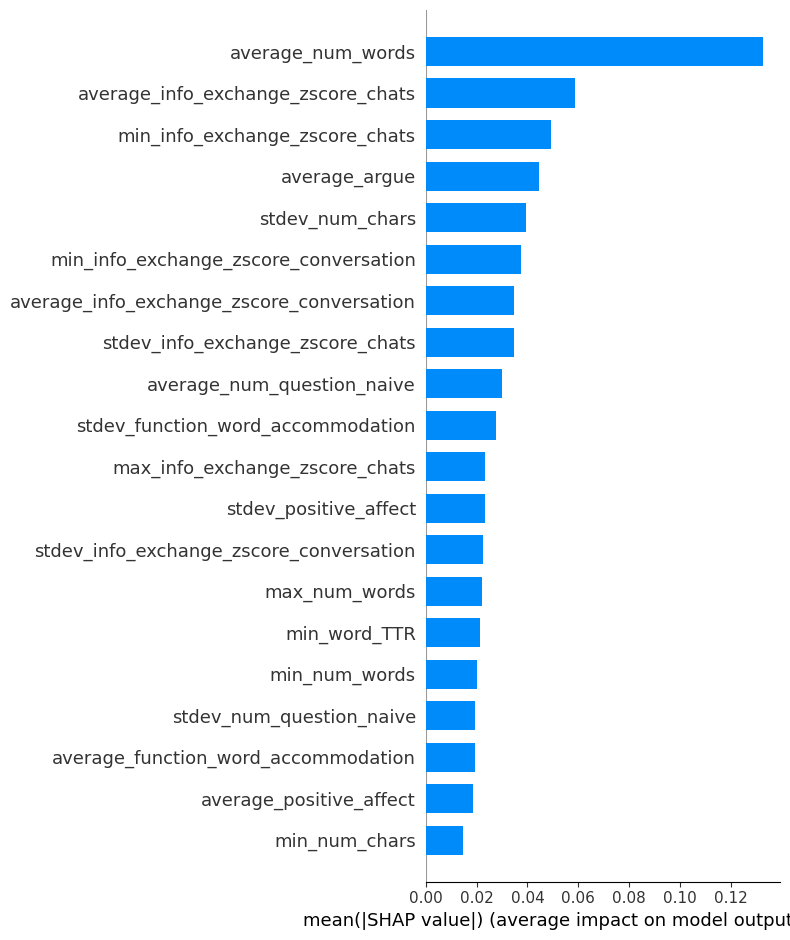

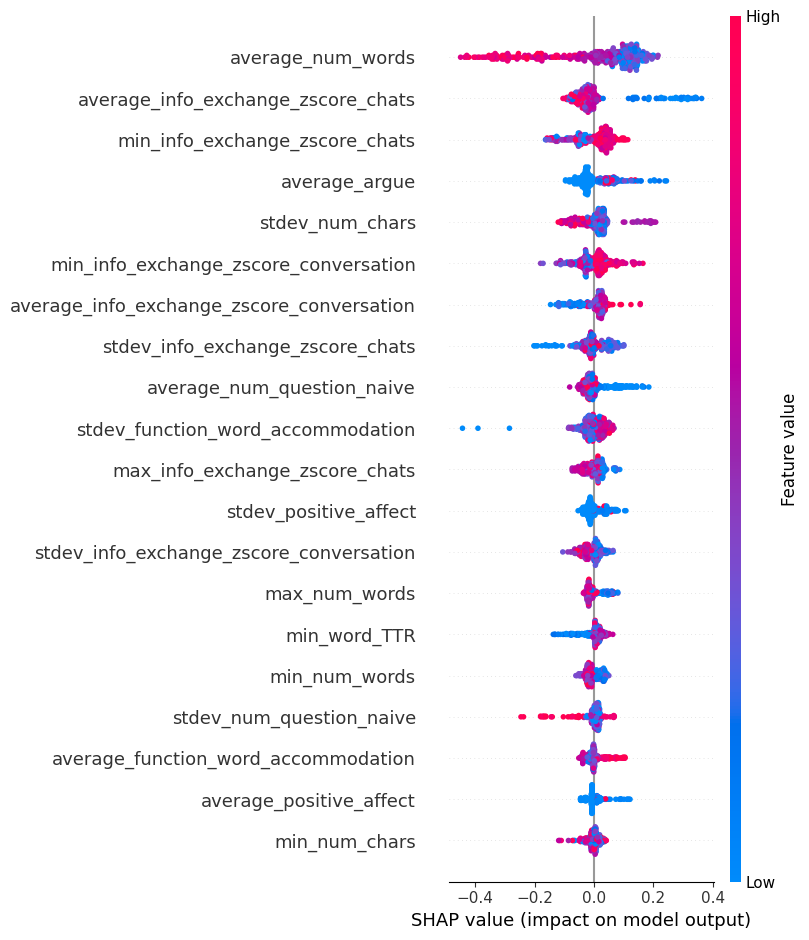

In [12]:
juries_model.model_diagnostics(juries_model.optimized_model)